In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn

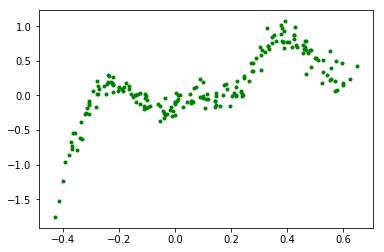

In [29]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [30]:
def inrange(X, break0, break1): #if x is after
    xmsk1 = X >= break0
    xmsk2 = X < break1
    xmsk = np.bitwise_and(xmsk1, xmsk2)
    xs = xmsk #*X
    return xs

In [31]:
def linear_interpolation(X, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros_like(X)
    for i in range(n-1):
        mask = inrange(X, break_x[i], break_x[i+1])
        Y_ = (y[i+1] - y[i])/(x[i+1] - x[i])*(X - x[i]) + y[i]
        Y = Y + Y_*mask
    return Y

In [43]:
def backward(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros((n, X.shape[0]))
    inranges = np.zeros((n-1, X.shape[0]))
    consts = np.zeros_like(inranges)
    
    for i in range(n-1):
        inranges[i] = inrange(X, break_x[i], break_x[i+1])
            
    for i in range(n-1):
        consts[i] = ((X-x[i])/(x[i+1] - x[i]))
    
    Y[0] = (-1* consts[0] +1)*inranges[0]
    Y[-1] = consts[-1]*inranges[-1]
    for i in range(1, n-1):
            a = consts[i-1]*inranges[i-1]
            b = (-1* consts[i] +1)*inranges[i]
            Y[i] = a+b
    Y = Y*dY
    ny = np.count_nonzero(inranges, axis=1)
    Y = Y.mean(axis=1)
    return Y

In [44]:
# print('parmy',parmy)
# Y = linear_interpolation(x, parmx, parmy)
# dy = Y-y
# error = (dy**2).mean()
# print('error=',error)
# dparmy = backward(x, dy, parmx, parmy)
# print('dparmy',dparmy)
# parmy = parmy - dparmy
# plt.scatter(x, y, marker='.', color='g')
# plt.plot(parmx, parmy)

In [54]:
n_breaks = 5
parmx = list(np.sort(np.random.uniform(x.min(), x.max(), size=(n_breaks-2))))
parmx = np.array([x.min()-0.2]+parmx+[x.max()+0.2])
parmy = np.sort(np.random.uniform(y.min(), y.max(), size=(n_breaks)))
print(parmx)
print(parmy)

[-0.62788197  0.01071021  0.17152244  0.43822561  0.84820345]
[0.19324711 0.2184958  0.69809552 0.88386126 1.01707157]


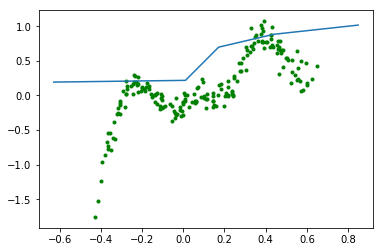

In [55]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(parmx, parmy)

_______________________
Steps 0
Error 0.24773841060566137


_______________________
Steps 10
Error 0.10036098463914234


_______________________
Steps 20
Error 0.09064883482971144


_______________________
Steps 30
Error 0.08514317867455311


_______________________
Steps 40
Error 0.08138305093315043


_______________________
Steps 50
Error 0.07860865789251417


_______________________
Steps 60
Error 0.07644777687755534


_______________________
Steps 70
Error 0.07469716663235867


_______________________
Steps 80
Error 0.07323982835091733


_______________________
Steps 90
Error 0.07200476494458564


_______________________
Steps 100
Error 0.07094616427575583


_______________________
Steps 110
Error 0.07003244001185595


_______________________
Steps 120
Error 0.06924039228417295


_______________________
Steps 130
Error 0.06855204586307125


_______________________
Steps 140
Error 0.06795289614573155


_______________________
Steps 150
Error 0.0674309010582646


____________________

TclError: this isn't a Tk application

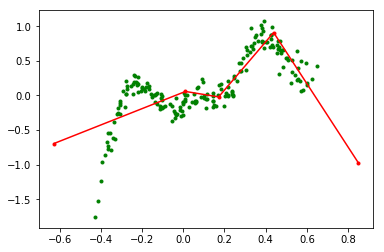

In [56]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    Y = linear_interpolation(x, parmx, parmy)
    dy = Y-y
    dparmy = backward(x, dy, parmx, parmy)
    parmy = parmy - dparmy #* 0.1 # update
    
    if step % 10 == 0:
        error = (dy**2).mean()
        
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(parmx, parmy, marker='.', color='r')

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

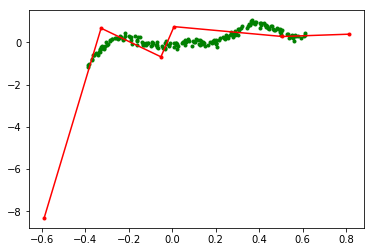

In [30]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(parmx, parmy, marker='.', color='r')